In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
conn = sqlite3.connect('sales_data.db')

In [4]:
# Create a cursor object
cursor = conn.cursor()

In [20]:
cursor.execute("DROP TABLE IF EXISTS sales")


In [21]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    order_id INTEGER PRIMARY KEY,
    order_date TEXT,
    customer_name TEXT,
    product TEXT,
    quantity INTEGER,
    price_per_unit REAL,
    total_amount REAL
)
''')

In [23]:
sales_entries = [
    (1, '2025-06-01', 'Alice', 'Laptop', 1, 800.0, 800.0),
    (2, '2025-06-02', 'Bob', 'Mouse', 2, 20.0, 40.0),
    (3, '2025-06-03', 'Charlie', 'Keyboard', 1, 50.0, 50.0)]


In [24]:
cursor.executemany('''
INSERT INTO sales (order_id, order_date, customer_name, product, quantity, price_per_unit, total_amount)
VALUES (?, ?, ?, ?, ?, ?, ?)
''', sales_entries)

In [25]:
# 2. Write and run SQL query
query = """
SELECT product, 
       SUM(quantity) AS total_qty, 
       SUM(quantity * price_per_unit) AS revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query, conn)


In [26]:
# Step 3: Print the result
print("Sales Summary:\n")
print(df)

Sales Summary:

    product  total_qty  revenue
0  Keyboard          1     50.0
1    Laptop          1    800.0
2     Mouse          2     40.0


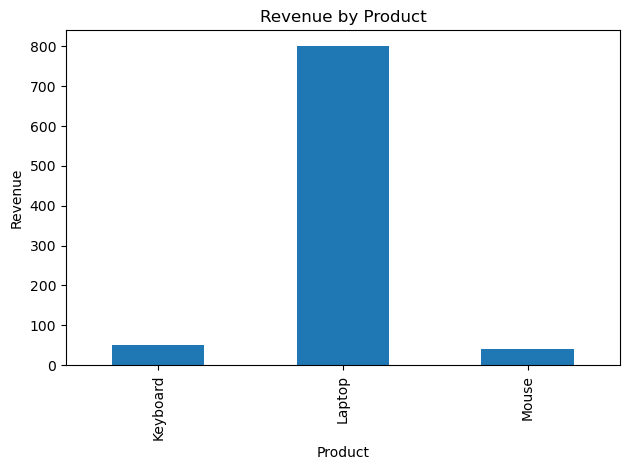

In [28]:
# Step 4: Plot a bar chart
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png") 
plt.show()

# Step 5: Close the connection
conn.close()

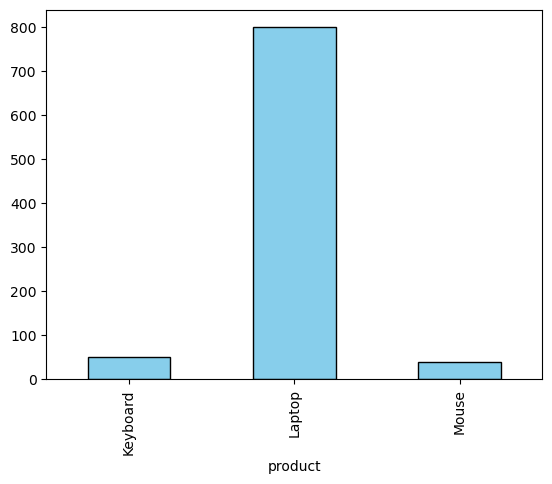

In [29]:
# Plot with customizations
ax = df.plot(
    kind='bar',
    x='product',
    y='revenue',
    color='skyblue',
    edgecolor='black',
    legend=False
)

In [32]:
import sqlite3
import pandas as pd

In [33]:
conn = sqlite3.connect("sales_data.db")

In [42]:
cursor = conn.cursor()

In [43]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    order_id INTEGER PRIMARY KEY,
    order_date TEXT,
    customer_name TEXT,
    product TEXT,
    quantity INTEGER,
    price_per_unit REAL,
    total_amount REAL
)
''')

In [44]:
sales_entries = [
    (1, '2025-06-01', 'Alice', 'Laptop', 1, 800.0, 800.0),
    (2, '2025-06-02', 'Bob', 'Mouse', 2, 20.0, 40.0),
    (3, '2025-06-03', 'Charlie', 'Keyboard', 1, 50.0, 50.0)
]

In [45]:
cursor.executemany('''
INSERT INTO sales (order_id, order_date, customer_name, product, quantity, price_per_unit, total_amount)
VALUES (?, ?, ?, ?, ?, ?, ?)
''', sales_entries)

In [46]:
# 1. Total number of orders
total_orders = pd.read_sql_query("SELECT COUNT(*) AS total_orders FROM sales", conn)


In [47]:
unique_customers = pd.read_sql_query("SELECT COUNT(DISTINCT customer_name) AS total_customers FROM sales", conn)

In [48]:
total_quantity = pd.read_sql_query("SELECT SUM(quantity) AS total_quantity FROM sales", conn)

In [49]:
total_revenue = pd.read_sql_query("SELECT SUM(total_amount) AS total_revenue FROM sales", conn)

In [50]:
most_sold_product = pd.read_sql_query("""
SELECT product, SUM(quantity) AS total_qty 
FROM sales 
GROUP BY product 
ORDER BY total_qty DESC 
LIMIT 1
""", conn)

In [51]:
print(" Total Orders:", total_orders.iloc[0]['total_orders'])
print(" Unique Customers:", unique_customers.iloc[0]['total_customers'])
print(" Total Quantity Sold:", total_quantity.iloc[0]['total_quantity'])
print(" Total Revenue: ₹", total_revenue.iloc[0]['total_revenue'])
print(" Most Sold Product:", most_sold_product.iloc[0]['product'])
conn.close()

 Total Orders: 3
 Unique Customers: 3
 Total Quantity Sold: 4
 Total Revenue: ₹ 890.0
 Most Sold Product: Mouse
